7  : E(W):  [231.11966929]  : Aw :  21.5  : Bw :  6.212829304561655  : Sw2 :  0.4427318656990187  : Ay :  9.0  : By :  [232.11966929]  : Sy2 :  22.90067391334532
7  : E(W):  [67.54998247]  : Aw :  34.0  : Bw :  11.89627807718132  : Sw2 :  0.31935533079534323  : Ay :  17.0  : By :  [299.66965176]  : Sy2 :  39.35932305622442
7  : E(W):  [26.57546844]  : Aw :  46.5  : Bw :  18.073086939824126  : Sw2 :  0.4295552283596131  : Ay :  25.0  : By :  [326.2451202]  : Sy2 :  12.38670462220514
7  : E(W):  [12.72905647]  : Aw :  59.0  : Bw :  24.409820505658285  : Sw2 :  0.35994719861300317  : Ay :  33.0  : By :  [338.97417667]  : Sy2 :  10.805338412718358
7  : E(W):  [10.03908873]  : Aw :  71.5  : Bw :  30.843017524233204  : Sw2 :  0.45373715763236255  : Ay :  41.0  : By :  [349.01326541]  : Sy2 :  8.645800663659527
7  : E(W):  [8.57009038]  : Aw :  84.0  : Bw :  37.29362347323877  : Sw2 :  0.3827361449407409  : Ay :  49.0  : By :  [357.58335578]  : Sy2 :  6.81590612716008
7  : E(W):  [8.02348727]

7  : E(W):  [5.22914149]  : Aw :  884.0  : Bw :  396.7678910441791  : Sw2 :  0.44011483157304243  : Ay :  561.0  : By :  [740.92655503]  : Sy2 :  1.3030600174288658
7  : E(W):  [5.21977841]  : Aw :  896.5  : Bw :  401.84403761610594  : Sw2 :  0.4778998542163468  : Ay :  569.0  : By :  [746.14633345]  : Sy2 :  1.2892168018218824
7  : E(W):  [5.21002236]  : Aw :  909.0  : Bw :  406.91022647810996  : Sw2 :  0.4503945013090941  : Ay :  577.0  : By :  [751.35635581]  : Sy2 :  1.3604409754531366
7  : E(W):  [5.20127962]  : Aw :  921.5  : Bw :  411.96598546741313  : Sw2 :  0.4567951857418  : Ay :  585.0  : By :  [756.55763543]  : Sy2 :  1.2142050104749145
7  : E(W):  [5.19223384]  : Aw :  934.0  : Bw :  417.011597087086  : Sw2 :  0.42965605305660665  : Ay :  593.0  : By :  [761.74986927]  : Sy2 :  1.266379909001193
7  : E(W):  [5.18353971]  : Aw :  946.5  : Bw :  422.0465634096548  : Sw2 :  0.44676679611586495  : Ay :  601.0  : By :  [766.93340899]  : Sy2 :  1.2647781789157417
7  : E(W):  [5.

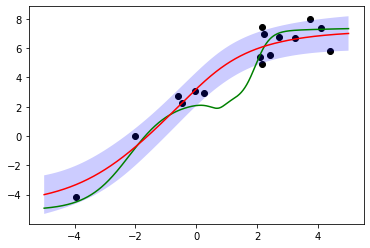

In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import sys

def tanh(x):
    # (2.24)
    return (np.exp(x) - np.exp(-x))/(np.exp(x) + np.exp(-x))

fig = plt.figure()
dataAreaMax = 5.0
dataAreaMin = -5.0

trainDataNum = 16
trainSigmaW2 = 9.0
trainSigmaY2 = 1.0
trainHiddenLayerNum = 5

#These values should be inferred
#learningSigmaW2 = 9.0
#learningSigmaY2 = 0.09
learningHiddenLayerNum = 8
learningAlfa = 0.002

prevError = sys.float_info.max
maxError = 5.0

# Parameters for inference of parameters
# The average of gamma distribution is a/b
# The variance of gamma distribution is a/b^2

# The average of SigmaW2 is 9
# The variance of SigmaW2 is 9
learningAW2 = 9.0
learningBW2 = 1.0
# The average of SigmaY2 is 1
# The variance of SigmaY2 is 1
learningAY2 = 1.0
learningBY2 = 1.0

# Get initial parameters for SigmaW2 and SigmaY2
learningSigmaW2 = 1/np.random.gamma(learningAW2, 1 / learningBW2, 1)
learningSigmaY2 = 1/np.random.gamma(learningAY2, 1 / learningBY2, 1)

class NN:
    def __init__(self, wh1, wh2):
        self.wh1 = wh1
        self.wh2 = wh2

    def setX(self, x):
        # Input layer
        self.z0 = np.array([x, 1])
        # (2.22)
        self.a1 = self.z0.dot(self.wh1.T)
        
        # (2.21)
        hiddenTmp = tanh(self.a1)
        self.z1 = np.append(hiddenTmp, 1.0)
        
        # (2.20)
        self.a2 = self.wh2.dot(self.z1)
    
    def updateWeight(self, wh1, wh2):
        self.wh1 = wh1
        self.wh2 = wh2


    def getZ0data(self):
        return self.z0
    
    def getA1data(self):
        return self.a1
    
    def getZ1data(self):
        return self.z1
    
    def getA2data(self):
        return self.a2
    
    def getDA(self):
        # nabra_w a for (2.58)
        
        # da2/dw2 = z1 (2.33)((2.48))
        dA2 = self.z1
        # da2/dw1 = z0 (2.51), (2.52), (tanh)' = 1 / cosh^2 = 1 - tanh^2
        dA1 = np.outer(self.wh2[0:-1] * (1 - self.z1[0:-1]**2), self.z0)
        
        return np.concatenate([dA2, np.concatenate(dA1)])

# Create train data
# Select weights
trainWh1 = []
for i in range(trainHiddenLayerNum):
    trainWh1.append(np.random.normal(loc = 0, scale = np.sqrt(trainSigmaW2), size = 2))
trainWh1 = np.array(trainWh1)
trainWh2 = np.random.normal(loc = 0, scale = np.sqrt(trainSigmaW2), size = trainHiddenLayerNum + 1)
#print(trainWh1)

# Select x data
trainXs = np.random.rand(trainDataNum) * (dataAreaMax - dataAreaMin) + dataAreaMin
#print(trainXs)

# Create y data
trainNN = NN(trainWh1, trainWh2)
trainYs = []
for x in trainXs:
    trainNN.setX(x)
    trainYs.append(trainNN.getA2data() + np.random.normal(loc = 0.0, scale = np.sqrt(trainSigmaY2), size = 1))

# Create a line
originalXs = np.linspace(dataAreaMin, dataAreaMax, 1000)
originalYs = []
for x in originalXs:
    trainNN.setX(x)    
    originalYs.append(trainNN.getA2data())
    
#Learing
#initialize data
learningWh1 = []

# Initialize weight
for i in range(learningHiddenLayerNum):
    learningWh1.append(np.random.normal(loc = 0, scale = np.sqrt(learningSigmaW2), size = 2))
learningWh1 = np.array(learningWh1)
learningWh2 = np.random.normal(loc = 0, scale = np.sqrt(learningSigmaW2), size = learningHiddenLayerNum + 1)

learningNN = NN(learningWh1, learningWh2)

# back propagation
while True:
    ew = 0.0
    dEw2 = np.zeros([1, learningHiddenLayerNum + 1])[0]
    dEw1 = np.zeros([learningHiddenLayerNum, 2])

    for x, y in zip(trainXs, trainYs):
        learningNN.setX(x)
        
        # (2.49)
        delta2 = learningNN.getA2data() - y
        # (2.54), (tanh)' = 1 / cosh^2 = 1 - tanh^2
        delta1 = delta2 * learningWh2[0:-1] * (1 - learningNN.getZ1data()[0:-1]**2)
        # (2.48)
        dEw2 += delta2 * learningNN.getZ1data()
        # (2.53)
        dEw1 += np.outer(delta1, learningNN.getZ0data())
        # (2.47)
        ew += 0.5 * delta2**2
        #print(" ", delta1)
        
#    print(ew)
#    print(dEw1)
#    print(dEw2)
#    print(learningWh1)
#    print(learningWh2)    
#    print(" ")
    
#    if ew > prevError:
#        break
#    prevError = ew
    if ew < maxError:
        break
    
    
    # update weights
    # These equations are almost the same with those of NN with regularization
    # (5.6), (5.8)
    learningWh1 = (1 - learningAlfa / learningSigmaW2)*learningWh1 - learningAlfa / learningSigmaW2 * dEw1
    learningWh2 = (1 - learningAlfa / learningSigmaW2)*learningWh2 - learningAlfa / learningSigmaW2 * dEw2
    learningNN.updateWeight(learningWh1, learningWh2)
    
    # Now, W has been sampled.
    # The paramters will be updated.
    tmpW1 = np.ravel(learningWh1)
    # (5.24)
    learningAW2 += (len(tmpW1) + len(learningWh2)) / 2
    # (5.25)
    learningBW2 += (tmpW1.dot(tmpW1) + learningWh2.dot(learningWh2)) / 2
    # (5.28)
    learningAY2 += trainDataNum / 2.0
    # (5.29)
    learningBY2 += ew

    # Update SigmaW2 and SigmaY2
    # (5.23)
    learningSigmaW2 = 1/np.random.gamma(learningAW2, 1/learningBW2, 1)[0]
    # (5.27)
    learningSigmaY2 = 1/np.random.gamma(learningAY2, 1/learningBY2, 1)[0]

    print(i, " : E(W): ", ew, " : Aw : ", learningAW2, " : Bw : ", learningBW2, " : Sw2 : ", learningSigmaW2, " : Ay : ", learningAY2, " : By : ", learningBY2, " : Sy2 : ", learningSigmaY2)    
    
# For debug
#    break

# Calculate Hessian
# (5.10)
lambdaWMap = (1 / learningSigmaW2) * np.eye(learningHiddenLayerNum + 1 + learningHiddenLayerNum * 2)
# (2.58)
for x in trainXs:
    learningNN.setX(x)
    dA = learningNN.getDA()
    lambdaWMap += (1/learningSigmaY2) * np.outer(dA, dA)
    
# Create estimated data
upperPredictedYs = []
lowerPredictedYs = []
mapYs = []
lambdaInv = np.linalg.inv(lambdaWMap)

calValNN = NN(learningWh1, learningWh2)
for x in originalXs:
    calValNN.setX(x)
    # Calculate g
    # (5.13). f = a
    g = calValNN.getDA()
    
    # (5.15)
    sigmaX = np.sqrt(learningSigmaY2 + g.dot(lambdaInv.dot(g)))

    upperPredictedYs.append(calValNN.getA2data() + sigmaX)
    lowerPredictedYs.append(calValNN.getA2data() - sigmaX)
    mapYs.append(calValNN.getA2data())
    
ax = fig.add_subplot(1, 1, 1)
plt.scatter(trainXs, trainYs, color = "black")
plt.plot(originalXs, originalYs, color = "green")
plt.plot(originalXs, mapYs, color = "red")
ax.fill_between(originalXs, upperPredictedYs, lowerPredictedYs, facecolor='blue', alpha=0.2)

plt.show()